## Principal Component Analysis for Dimensionality Reduction in Python

In [1]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

In [2]:
X,y = make_classification(n_samples = 1000, n_features = 20, n_informative = 15, n_redundant = 5, random_state = 1)
steps = [('pca', PCA(n_components = 10)), ('m',  LogisticRegression())]
model = Pipeline(steps = steps)
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
n_scores = cross_val_score(model, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1, error_score = 'raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.842 (0.031)


In this case, we can see that the PCA transform with logistic regression achieved a performance of about 81.8 percent.

## Working on an example

>1 0.542 (0.048)
>2 0.713 (0.048)
>3 0.720 (0.053)
>4 0.723 (0.051)
>5 0.725 (0.052)
>6 0.730 (0.046)
>7 0.805 (0.036)
>8 0.800 (0.037)
>9 0.814 (0.036)
>10 0.816 (0.034)
>11 0.819 (0.035)
>12 0.819 (0.038)
>13 0.819 (0.035)
>14 0.853 (0.029)
>15 0.865 (0.027)
>16 0.865 (0.027)
>17 0.865 (0.027)
>18 0.865 (0.027)
>19 0.865 (0.027)
>20 0.865 (0.027)


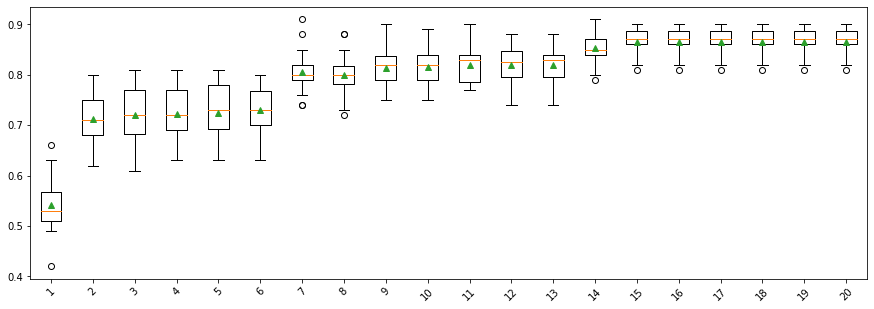

In [3]:
# compare pca number of components with logistic regression algorithm for classification
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,21):
        steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.figure(figsize = (15,5))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

We don’t see any improvement beyond 15 components. This matches our definition of the problem where only the first 15 components contain information about the class and the remaining five are redundant.

A box and whisker plot is created for the distribution of accuracy scores for each configured number of dimensions.

We can see the trend of increasing classification accuracy with the number of components, with a limit at 15.

In [4]:
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[0.2929949,-4.21223056,-1.288332,-2.17849815,-0.64527665,2.58097719,0.28422388,-7.1827928,-1.91211104,2.73729512,0.81395695,3.96973717,-2.66939799,3.34692332,4.19791821,0.99990998,-0.30201875,-4.43170633,-2.82646737,0.44916808]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


Running the example fits the Pipeline on all available data and makes a prediction on new data.

Here, the transform uses the 15 most important components from the PCA transform, as we found from testing above.

A new row of data with 20 columns is provided and is automatically transformed to 15 components and fed to the logistic regression model in order to predict the class label.